<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python</center>

# DSPy4 Pandas "advanced". Challenge

<img src="movie_slashers.jpg" style="width:800px">

**Inicialización**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)

Continuamos con el dataset `filmdeathcounts.csv`, del que vamos a intentar aprender algunas cosas más:

**Ejercicio 1:** ¿Nos estamos volviendo más violentos con el tiempo en lo que a cine se refiere? ¿Cuánta evidencia tienes de tu respuesta? _Hint: Para poder responder bien a este ejercicio, serían interesantes dos gráficos: violencia por año y películas por año..._

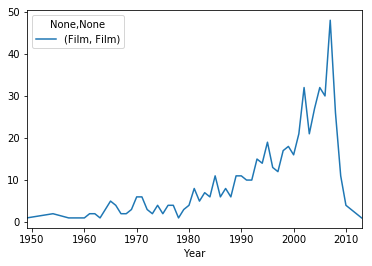

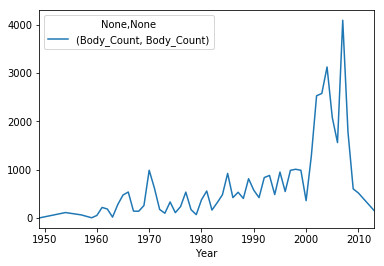

In [2]:
# Read CSV file
df = pd.read_csv('filmdeathcounts.csv')
#film per year
film_per_year= df.groupby(['Year']).agg({'Film': [("Film","count")]})
film_per_year.plot(kind='line')
#violence per year
violence_per_year = df.groupby(['Year']).agg({'Body_Count': [("Body_Count","sum")]})
violence_per_year.plot(kind='line')


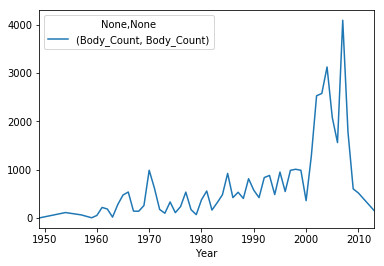

In [3]:
df_grouped2 = df.groupby('Year')
df_grouped2 = df_grouped2.agg({'Body_Count': [("Body_Count","sum")]})
df_grouped2.plot(kind='line')


**Ejercicio 2:** ¿Cuáles la violencia media por cada calificación de la MPAA? _Hint: los ratings de la MPAA han cambiado con el tiempo. Hay que agrupar aquellos que significan lo mismo..._

In [4]:
#scatter plot
# group by Calificacion
# Relacion  + violenta de calificacion + muertes ????
# Equivalencia de calificaciones de peliculas antiguas MPAA_Rating 
df['MPAA_Rating']

#https://es.wikipedia.org/wiki/Sistema_de_calificaciones_de_la_Asociación_Cinematográfica_de_Estados_Unidos

#NC-17 --> X
#R
#PG-13
#PG --> M / GP
#Unrated --> NR
#G --> approved

# Grouping 
mask_NC = df["MPAA_Rating"].str.contains("NC-17|X")
mask_PG = df["MPAA_Rating"].str.contains("PG|M|GP")
mask_unrated = df["MPAA_Rating"].str.contains("NR|Unrated")
mask_G = df["MPAA_Rating"].str.contains("G|approved")
mask_R = df["MPAA_Rating"] == "R"
mask_PG13 = df["MPAA_Rating"] == "PG-13"

NC=df[mask_NC].Body_Count.mean()
PG=df[mask_PG].Body_Count.mean()
Unrated=df[mask_unrated].Body_Count.mean()
G=df[mask_G].Body_Count.mean()
R=df[mask_R].Body_Count.mean()


print("NC:",NC)
print("PG:", round(PG,2))
print("Unrated:",round(Unrated,2))
print("G:",round(G,2))
print("R:",round(R,2))
print("PG-13:",round(PG-13,2))

NC: 33.25
PG: 72.18
Unrated: 106.59
G: 72.34
R: 69.69
PG-13: 59.18


**Ejercicio 3 [Hard mode]**: Muestra la violencia promedio por director y género: ¿cuál es el director y género más violentos?
<img src="ZackSnyder.jpg" style="height: 500px">

Esta es la operación más compleja de todo el challenge:

In [8]:
# ToDo: Convertir los valores de "director" y "género" en listas de directores y géneros. Hint: apply

df['Genre'] = df['Genre'].str.split('|')
df['Director'] = df['Director'].str.split('|')

# Creamos una columna donde cada fila es un director de la película, con el mismo índice que el dataframe original. 
# Si la película tiene más de un director, tendremos entonces varias filas con el mismo índice.
director = df.apply(lambda row: pd.Series(row['Director']),axis=1).stack().reset_index(level=1, drop=True)
director.name = 'Director'

# Hacemos lo mismo con el género
genre = df.apply(lambda row: pd.Series(row['Genre']),axis=1).stack().reset_index(level=1, drop=True)
genre.name = 'Genre'

# Eliminamos las columnas antiguas
df = df.drop('Director', axis=1)
df = df.drop('Genre', axis=1)

# Unimos las columnas nuevas al dataframe original haciendo match con el índice: como tenemos índices repetidos 
# tanto en la nueva columna director como en género, el dataframe resultante tendrá filas con todos los valores
# repetidos menos director y género.
df = df.join(director)
df = df.join(genre)
df

#df.pivot_table(values='(Body_Count)', index='Director', columns='Genre', aggfunc=np.mean)
#df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)


,Film,Year,Body_Count,MPAA_Rating,Length_Minutes,IMDB_Rating,Director,Genre
0,24 Hour Party People,2002,7,R,117,7.3,Michael Winterbottom,Biography
0,24 Hour Party People,2002,7,R,117,7.3,Michael Winterbottom,Comedy
0,24 Hour Party People,2002,7,R,117,7.3,Michael Winterbottom,Drama
0,24 Hour Party People,2002,7,R,117,7.3,Michael Winterbottom,Music
0,24 Hour Party People,2002,7,R,117,7.3,Michael Winterbottom,Biography
...,...,...,...,...,...,...,...,...
544,Zulu,1964,140,Unrated,138,7.8,Cy Endfield,History
544,Zulu,1964,140,Unrated,138,7.8,Cy Endfield,War
544,Zulu,1964,140,Unrated,138,7.8,Cy Endfield,Drama
544,Zulu,1964,140,Unrated,138,7.8,Cy Endfield,History


***

Para los siguientes ejercicios recuperamos de nuevo "tmdb_5000_movies.csv", con más películas y más información sobre las mismas.

**Ejercicio 4 [Hard mode]:** ¿Cómo afecta el presupuesto de las películas al número de muertes?

In [6]:
# merging dataframe section
# fuzzy matching
#from fuzzywuzzy import fuzz
#conda install -c conda-forge fuzzywuzzy
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [7]:
df2['original_title']
#df['Film']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: original_title, Length: 4803, dtype: object